# Vocab / Tokenizer

Building a Vocab & bring in some sample data

In [1]:
!pip install -q d2l==1.0.0-alpha1.post0

In [2]:
import torch
from d2l import torch as d2l
import re
from matplotlib import pyplot as plt
import numpy as np

In [3]:
class TimeMachine(d2l.DataModule): #@save
    def _download(self):
        fname = d2l.download(d2l.DATA_URL + 'timemachine.txt', self.root,
                             '090b5e7e70c295757f55df93cb0a180b9691891a')
        with open(fname) as f:
            return f.read()

data = TimeMachine()
raw_text = data._download()
raw_text[0:30]

'The Time Machine, by H. G. Wel'

In [4]:
aa = {}
aa["sss"] = 20
aa

{'sss': 20}

In [17]:
class Vocab:
    def __init__(self):
        self.tokens = []
        self.token_to_id = {}
        self.token_freq = {}
        
        self._process_word("<unk>")
        
    def to_id(self, word):
        if word in self.token_to_id:
            return self.token_to_id[word]
        else:
            return self.token_to_id["<unk>"]
        
    def to_token(self, id):
        if id < len(self.tokens):
            return self.tokens[id]
        else:
            return self.tokens[0]
    
    def _process_word(self, word):
        idx = 0
        if word in self.token_to_id:
            idx = self.token_to_id[word]
            self.token_freq[idx] += 1;
        else:
            self.tokens.append(word)
            idx = len(self.tokens) - 1
            self.token_to_id[word] = idx
            self.token_freq[idx] = 1
            
        return idx
            
    def tokenize(self, text):
        cleaned = re.sub('[^A-Za-z]+', ' ', text).lower().strip()
        return cleaned.split(" ")
        
    def build(self, text):
        corpus = [self._process_word(word) for word in self.tokenize(text)]
        self.token_freq = dict(sorted(self.token_freq.items(), key=lambda item: item[1], reverse=True))
        return corpus
    
    
vocab = Vocab()
corpus = vocab.build(raw_text)
len(corpus)

32775

## Usage

In [18]:
# token some set of text
tokens = vocab.tokenize("I am done.")
tokens

['i', 'am', 'done']

In [19]:
# convert these tokens into ids
ids = [vocab.to_id(token) for token in tokens]
ids

[8, 451, 401]

In [20]:
# convert ids back to tokens
" ".join([vocab.to_token(id) for id in ids])

'i am done'

## Stats

In [21]:
## most used words
most_ids = list(vocab.token_freq.keys())[0:10]
[vocab.to_token(id) for id in most_ids]

['the', 'i', 'and', 'of', 'a', 'to', 'was', 'in', 'that', 'my']

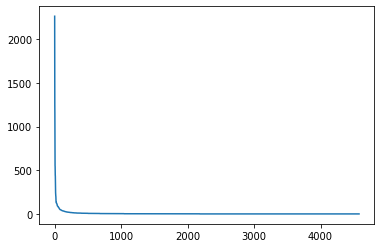

In [10]:
## graphing these
X = range(0, len(vocab.token_freq))
Y = vocab.token_freq.values()
plt.plot(X, Y)

<ipython-input-11-2230a5e616ce>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(X), Y)


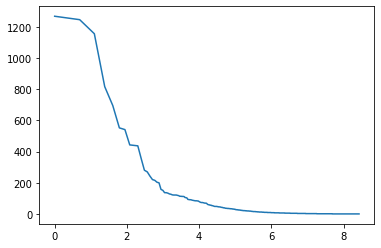

In [11]:
# Let's show X items in the log scale
plt.plot(np.log(X), Y)